# INDICE:
1. Instalación de librerías
2. Carga de Datos
3. Análisis exploratorio
4. WordClouds
5. Word Embeddings
6. Análisis de los sentimientos
7. Comparación de modelos

# 1.INSTALAR LIBRERÍAS

In [ ]:
!pip install -q opendatasets
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install spacy
!pip install nltk
!pip install wordcloud
!pip install gensim
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install transformers==4.37.2
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**RECORDATORIO: IMPORTANTE DESCARGAR LA VERSIÓN DE TRANSFORMERS 4.37.2 PARA QUE EL MODELO DE BERT FUNCIONE CORRECTAMENTE**

In [ ]:
import opendatasets as od
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import gensim.downloader
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import preprocess_string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM
from transformers import BertTokenizer, TFBertForSequenceClassification, pipeline, TFBertModel, AutoModelForSequenceClassification, TFAutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from sklearn.model_selection import train_test_split
from scipy.special import softmax

In [ ]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# 2.CARGAR EL DATASET

In [ ]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv('DisneylandReviews.csv', encoding='latin1')

# Mostrar las primeras filas del conjunto de datos
print("=========================================")
print("Primeras filas del conjunto de datos:")
print(df.head())

# Definir el nombre de las columnas
column_names = df.columns.tolist()
print("=========================================")
print("\nNombres de las columnas:", column_names)

Primeras filas del conjunto de datos:
   Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
import pandas as pd
from textblob import TextBlob

# Mostrar el encabezado del dataframe con los nombres de las columnas
column_names = df.columns.tolist()
print("Nombres de las columnas:")
print(column_names)

# Definir una función para el análisis de sentimientos
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar el análisis de sentimientos a la columna 'Review_Text'
df['sentiment'] = df['Review_Text'].apply(sentiment_analysis)

# Mostrar el encabezado del dataframe con las columnas adicionales
print("\nEncabezado del DataFrame con análisis de sentimientos:")
print(df.head())


Nombres de las columnas:
['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text', 'Branch']

Encabezado del DataFrame con análisis de sentimientos:
   Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
#Mostramos 5 registros aleatorios
df.sample(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment
3293,428287544,4,2016-10,Singapore,"If your Kid loves Disney please visit. else not much to do, rides are alittle boring not what I expected. be prepared to walk alot. Depends on when you go, you might have to queue very long.",Disneyland_HongKong,Negativo
24067,165721820,5,2013-6,Australia,What can you say. It's disneyland. Miss 3 and 8 were in total awe for 4 days straight. Did the top package at bibbiti bobbidi boutique and yeah it's a little Pricey but the girls absolutely loved it. Asking to go back already. Highlight of 2 weeks in USA.,Disneyland_California,Positivo
41804,118686971,5,2010-12,United Kingdom,"Having worked at Disneyworld in florida i was expecting paris to come up a little short, however if i'm honest, i prefer this magic kingdom park to florida, with the exception of the weather. It is such a beautiful place. Sure the service isnt quite on the same level as florida and the french speaking staff can be a little rude to tourists, especially if you dont speak french, but at the end of the day, you are in france. The attractions in this park are i think better then any other disney park. although i do miss splash mountain. The park was immaculate, no rubbish around, excellent food services and stores all over. the shows are incredible as usual with any disney park. The only downside was the temperature, december in paris is very very cold and so hard to completely enjoy the parks. Although unlike florida paris gets real snow and at christmas with al the decorations it looks truly magical.",Disneyland_Paris,Positivo
34099,368917527,5,2016-4,United Kingdom,"We took out 4 year old granddaughter and she loved it, to be fair I have done the Florida park and this is much more compact, easier to get to and from rides, fantasy land area was more suitableFor us as dumbo ride, tea cups, carousel, Casey railroad, pinocio, small world and many more rides were in this area. We were very disappointed in other areas of the park as many rides were closed for refurbishment no Peter Pan ride, no Star Wars ride to mention just a few, a couple of the Disney train stations were closed. The one show you must see in the park was Forrest of enchantment in the Chaparral Theatre, this was incredible with repunzal, Tarzan, jungle book characters and much more, you might have to queue to get in but everyone will be seated.",Disneyland_Paris,Positivo
3852,389353686,3,2016-7,Australia,"For those who have been to LA or Florida, one day here will be enough. It is a real Disney clean, friendly staff, regular favourite rides but be ready to experience the stifling humidity. Try and ensure you have the option of the swim available at then end of the day; also be warned that inclement weather caused the cancellation of the night parade both nights we were there",Disneyland_HongKong,Positivo


In [ ]:
# Mostrar el número de filas y columnas
num_rows, num_cols = df.shape
print("\nNúmero de filas:", num_rows)
print("Número de columnas:", num_cols)


Número de filas: 42656
Número de columnas: 7


In [ ]:
# Definir el nombre de las columnas
column_names = df.columns.tolist()
print("\nNombres de las columnas:", column_names)


Nombres de las columnas: ['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text', 'Branch', 'sentiment']


# 3.Análisis exploratorio de datos

In [ ]:
# Explorar la distribución de las etiquetas
sentiment_distribution = df['sentiment'].value_counts()
print("\nDistribución de las etiquetas:")
print(sentiment_distribution)


Distribución de las etiquetas:
Positivo    38581
Negativo     3786
Neutral       289
Name: sentiment, dtype: int64


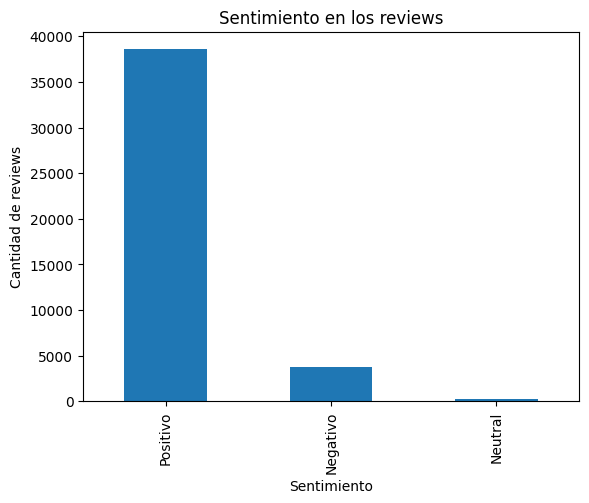

In [ ]:
# Visualizar la relación entre el sentimiento y el review
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentimiento en los reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de reviews')
plt.show()

# Como el conjunto de datos solo tiene las etiquetas 'positive' y 'negative', no hay categorías adicionales para explorar

# 4.PRE-PROCESAMIENTO DE DATOS

In [ ]:
# Se limpiarán los datos, eliminando caracteres especiales- si los hay-, se convertirá a string , se reemplazarán las contracciones,
# se convertirá todo a minúscula, se eliminaran stopwords (pronombres, etc)

# Descargar los stopwords de NLTK para usarlos más adelante en la limpieza de datos
#Se importará un pool de palabras comunes que bien podrían ser redundante en nuestro análisis y servirán como filtro
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def limpieza(text):
    #Eliminar caracteres especiales
    text = re.sub(r'\W', ' ', text)
    #Convertir a string
    text= str(text)
    #Reemplazar contracciones
    contractions = {
        "ain't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "I would",
        "i'll": "I will",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "must've": "must have",
        "mustn't": "must not",
        "needn't": "need not",
        "oughtn't": "ought not",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that'd": "that would",
        "that's": "that is",
        "there'd": "there had",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where'd": "where did",
        "where's": "where is",
        "who'll": "who will",
        "who's": "who is",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }
    text = text.split()
    text = [contractions[word] if word in contractions else word for word in text]
    text = ' '.join(text)
    #Covertir a minúsculas
    text=text.lower()
    #Eliminar espacios extra (espacios en blanco)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Limpiar la columna 'Review_Text'
df['Clean_Review_Text'] = df['Review_Text'].apply(limpieza)

In [ ]:
# Se unirán las palabras limpiadas previamente en review_clean y luego se las divide en cadenas individuales
words = ' '.join(df['Clean_Review_Text']).split()

# Se calculará la frecuencia de las palabras con value_counts
word_freq = pd.Series(words).value_counts()

# Seleccionar las palabras en stop_words que están presentes en el índice de word_freq
stop_words_filtered = [word for word in stop_words if word in word_freq.index]

# Seleccionar las frecuencias de las palabras filtradas
stopwords_freq = word_freq[stop_words_filtered]

# Eliminar las filas vacías
df.dropna(inplace=True)

# Imprimir el valor de las filas con valores vacíos en alguna columna
print("\nValores de las filas con valores vacíos en alguna columna:")
print(df[df.isnull().any(axis=1)])


Valores de las filas con valores vacíos en alguna columna:
Empty DataFrame
Columns: [Review_ID, Rating, Year_Month, Reviewer_Location, Review_Text, Branch, sentiment, Clean_Review_Text]
Index: []


ANÁLISIS DE RESULTADO ANTERIOR:
No hay valores nulos en este DataFrame

In [ ]:
#Se imprimirá el DataFrame con la limpieza en sus datos hecha para no vovler a hacer un pre-procesamiento
#Tienen que verse el index numérico y 3 columnas= review, sentiment, review_clean (con los cambios)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,Clean_Review_Text
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Disneyland_HongKong,Positivo,if you ve ever been to disneyland anywhere you ll find disneyland hong kong very similar in the layout when you walk into main street it has a very familiar feel one of the rides its a small world is absolutely fabulous and worth doing the day we visited was fairly hot and relatively busy but the queues moved fairly well
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",Disneyland_HongKong,Positivo,its been a while since d last time we visit hk disneyland yet this time we only stay in tomorrowland aka marvel land now they have iron man experience n d newly open ant man n d wasp ironman great feature n so exciting especially d whole scenery of hk hk central area to kowloon antman changed by previous buzz lightyear more or less d same but i m expecting to have something most however my boys like it space mountain turns into star wars this 1 is great for cast members staffs felt bit minus point from before just dun feel like its a disney brand seems more local like ocean park or even worst they got no smiling face but just wanna u to enter n attraction n leave hello this is supposed to be happiest place on earth brand but just really dont feel it bakery in main street now have more attractive delicacies n disney theme sweets these are good points last they also have starbucks now inside the theme park
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",Disneyland_HongKong,Positivo,thanks god it wasn t too hot or too humid when i was visiting the park otherwise it would be a big issue there is not a lot of shade i have arrived around 10 30am and left at 6pm unfortunately i didn t last until evening parade but 8 5 hours

# 4.WORDCLOUDS

In [ ]:
#Se mostrarán los wordclouds de las palabras para las clases: POSITIVE-NEGATIVE del Dataset

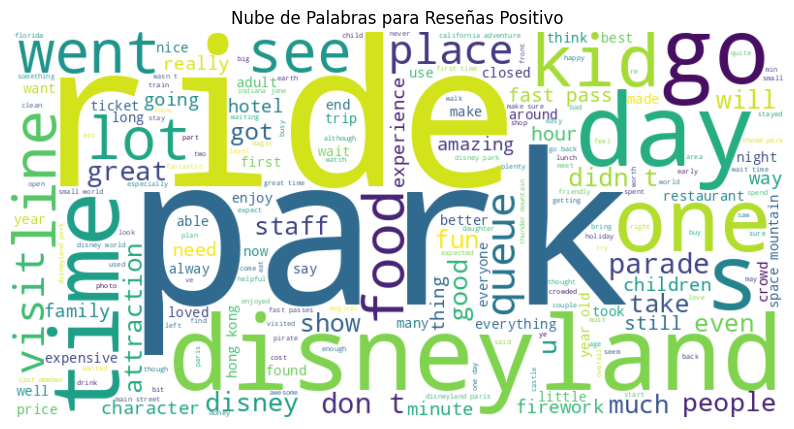

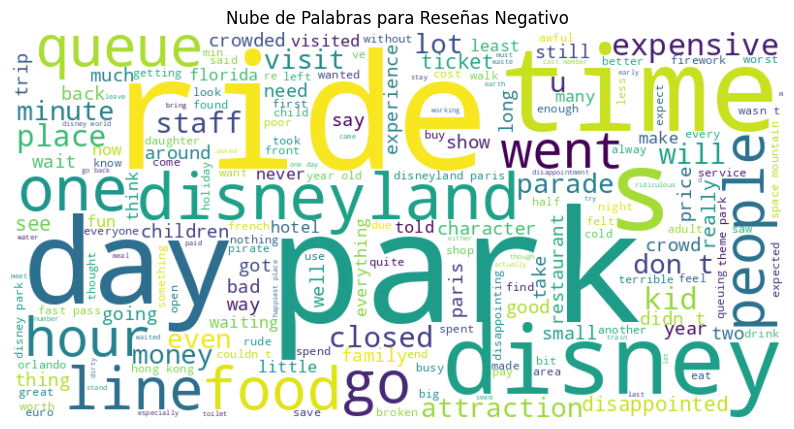

In [ ]:
# Generar nubes de palabras para cada clase
for sentiment in ['Positivo', 'Negativo']:
    # Filtrar las palabras según la etiqueta de sentimiento
    words_sentiment = ' '.join(df[df['sentiment'] == sentiment]['Clean_Review_Text'].values)

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words_sentiment)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nube de Palabras para Reseñas {sentiment.capitalize()}')
    plt.axis('off')
    plt.show()


# 5.WORD EMBEDDINGS

Se representarán los textos como vectores numéricos para que pueda comprenderlo la máquina y sirva de entrada para los modelos.

## Se utilizará BAG OF WORDS para mostrar las palabras del dataset acoorde a su frecuencia en éste

In [ ]:
count_vectorizer=CountVectorizer()
count_vectorizer.fit(df['Clean_Review_Text'])
vectorized_text=count_vectorizer.transform(df['Clean_Review_Text'])
#Imprimir ejemplo
print ("Representación vectorial con CountVectorizer:")
print (vectorized_text[0])

Representación vectorial con CountVectorizer:
  (0, 2379)	1
  (0, 3628)	2
  (0, 3888)	1
  (0, 5512)	1
  (0, 7016)	1
  (0, 7019)	1
  (0, 10944)	1
  (0, 12229)	2
  (0, 12625)	1
  (0, 14456)	1
  (0, 15102)	1
  (0, 15187)	2
  (0, 15239)	1
  (0, 15630)	1
  (0, 15821)	1
  (0, 18567)	1
  (0, 19294)	1
  (0, 19448)	1
  (0, 19869)	1
  (0, 20144)	1
  (0, 20868)	1
  (0, 21036)	1
  (0, 21084)	1
  (0, 21148)	1
  (0, 21882)	1
  (0, 22217)	1
  (0, 22719)	1
  (0, 23353)	1
  (0, 25160)	1
  (0, 26305)	1
  (0, 26485)	1
  (0, 30266)	1
  (0, 31274)	1
  (0, 32059)	1
  (0, 34178)	1
  (0, 34545)	1
  (0, 36109)	1
  (0, 37551)	4
  (0, 38247)	1
  (0, 40366)	1
  (0, 40493)	2
  (0, 40703)	1
  (0, 40966)	1
  (0, 41105)	1
  (0, 41239)	1
  (0, 41364)	1
  (0, 41497)	1
  (0, 42003)	1
  (0, 42058)	1
  (0, 42375)	3


## Representación del texto con TF-IDF para identificar la relevancia de uan palabra

In [ ]:
# Representar los textos con TF-IDF
# Crear una instancia de TfidfVectorizer
filtered_data= df['Clean_Review_Text']
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(filtered_data)
tf_idf_vectorized_text = tf_idf_vectorizer.transform(filtered_data)

# Imprimir un ejemplo
print("Representación vectorial con TF-IDF:")
print(tf_idf_vectorized_text[0])

Representación vectorial con TF-IDF:
  (0, 42375)	0.1775177835729147
  (0, 42058)	0.10604310854674262
  (0, 42003)	0.10350991944390094
  (0, 41497)	0.08897272401561204
  (0, 41364)	0.10014922009816829
  (0, 41239)	0.05565055128834768
  (0, 41105)	0.05438923620694354
  (0, 40966)	0.13087309645573714
  (0, 40703)	0.11483688974099215
  (0, 40493)	0.15805119886448085
  (0, 40366)	0.1297396868809258
  (0, 38247)	0.04187714035651938
  (0, 37551)	0.15369472800672737
  (0, 36109)	0.13842007464490408
  (0, 34545)	0.10738379562638302
  (0, 34178)	0.18484489677369392
  (0, 32059)	0.061383797858684114
  (0, 31274)	0.21104616536944676
  (0, 30266)	0.1127512085948631
  (0, 26485)	0.07978823375016843
  (0, 26305)	0.04897450110208784
  (0, 25160)	0.2060050215428996
  (0, 23353)	0.12386423798982703
  (0, 22719)	0.14955283785427426
  (0, 22217)	0.22969747696709084
  (0, 21882)	0.13734265011283434
  (0, 21148)	0.11812076028098252
  (0, 21084)	0.04824210888839427
  (0, 21036)	0.051858578558244474
  (0, 20

EJEMPLO DE USO DE MODELO PRE-ENTRENADO DE PALABRAS DE **TWITTER**

In [ ]:
# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-25')

# Find the 5 most similar words to 'xbox'
try:
    similar_words = glove_vectors.most_similar('xbox', topn=10)
    print("10 palabras más similares a 'xbox':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity}")
except KeyError:
    print("'xbox' is not in the vocabulary.")


[==================================================] 100.0% 104.8/104.8MB downloaded
10 palabras más similares a 'xbox':
itunes: 0.9039908051490784
nintendo: 0.9014114737510681
wii: 0.9012489318847656
app: 0.8909781575202942
flash: 0.8798494338989258
windows: 0.8746632933616638
ios: 0.8732163906097412
ipod: 0.8730481266975403
playstation: 0.8725075125694275
cod: 0.871073842048645


# Entrenamiento desde 0 con Word2vec y Glove el modelo ya limpio

**DESCARGA DE GLOVE **

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-03-08 09:30:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-08 09:30:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-08 09:30:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import gensim.downloader

# Cargar el modelo pre-entrenado de GloVe "glove-wiki-gigaword"
# glove_model = gensim.downloader.load('glove-wiki-gigaword-100')
#Descargar el modelo de embedding Word2Vec en línea
#Opción más espesa de modelo peor más completa : word2vec-google-news-300
word2vec_model = gensim.downloader.load('glove-wiki-gigaword-100')
# Obtener el vocabulario del modelo
# vocabulario = glove_model.index_to_key

# Imprimir algunas palabras del vocabulario
# print("Algunas palabras del modelo GloVe 'glove-wiki-gigaword':")
# print(vocabulario[:100])  # Imprime las primeras 100 palabras del vocabulario


[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Obtener el vocabulario del modelo word2vector
# Útil para no tener uq eperder el tiempo en caso de que la palabra key de similitud no esté dentro del modelo
vocab = word2vec_model.key_to_index.keys()

# Mostrar las primeras 100 palabras del vocabulario
print(list(vocab)[:100])


['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.']


In [ ]:
#PRIMERA MANERA DE UTILIZAR LOS MODELOS GLOVE Y WORD2VECTOR
#SE USARÁ UN IF ELSE COMO FILTRO PARA ENCONTRAR LAS PAKABRAS SIMILARES A "GOOD" Y "BAD"
from gensim.models import Word2Vec
import numpy as np
import gensim.downloader

# Definir la palabra objetivo
target_word_good = 'good'
target_word_bad = 'bad'

# Ejemplo de vectores de palabras generados por Word2Vec
print(f"Word2Vec vector for '{target_word_good}':", word2vec_model[target_word_good])
print(f"Word2Vec vector for '{target_word_bad}':", word2vec_model[target_word_bad])

# Ejemplo de palabras más similares a 'good' y 'bad' usando GloVe
print(f"\nPalabras similares a '{target_word_good}' según GloVe:")
try:
    similar_words_good = word2vec_model.most_similar(target_word_good, topn=5)
    for word, similarity in similar_words_good:
        print(f"{word}: {similarity}")
except KeyError:
    print(f"'{target_word_good}' no está en el vocabulario de GloVe.")

print(f"\nPalabras similares a '{target_word_bad}' según GloVe:")
try:
    similar_words_bad = word2vec_model.most_similar(target_word_bad, topn=5)
    for word, similarity in similar_words_bad:
        print(f"{word}: {similarity}")
except KeyError:
    print(f"'{target_word_bad}' no está en el vocabulario de GloVe.")


Word2Vec vector for 'good': [-0.030769   0.11993    0.53909   -0.43696   -0.73937   -0.15345
  0.081126  -0.38559   -0.68797   -0.41632   -0.13183   -0.24922
  0.441      0.085919   0.20871   -0.063582   0.062228  -0.051234
 -0.13398    1.1418     0.036526   0.49029   -0.24567   -0.412
  0.12349    0.41336   -0.48397   -0.54243   -0.27787   -0.26015
 -0.38485    0.78656    0.1023    -0.20712    0.40751    0.32026
 -0.51052    0.48362   -0.0099498 -0.38685    0.034975  -0.167
  0.4237    -0.54164   -0.30323   -0.36983    0.082836  -0.52538
 -0.064531  -1.398     -0.14873   -0.35327   -0.1118     1.0912
  0.095864  -2.8129     0.45238    0.46213    1.6012    -0.20837
 -0.27377    0.71197   -1.0754    -0.046974   0.67479   -0.065839
  0.75824    0.39405    0.15507   -0.64719    0.32796   -0.031748
  0.52899   -0.43886    0.67405    0.42136   -0.11981   -0.21777
 -0.29756   -0.1351     0.59898    0.46529   -0.58258   -0.02323
 -1.5442     0.01901   -0.015877   0.024499  -0.58017   -0.67659

In [ ]:
#SEGUNDA MANERA DE UTIIZAR LOS MODELOS PRE-ENTRENADOS , PERO SIN IF-ELSE
from gensim.models import Word2Vec
import numpy as np
import gensim.downloader

# Definir la variable con el dataset preprocesado
filtered_data = ['Clean_Review_Text']

# Tokenización de los textos preprocesados (asumiendo que filtered_data está definido)
tokenized_text = [text.split() for text in filtered_data]

# Ejemplo de vectores de palabras generados por Word2Vec
print("Word2Vec vector for 'bad':", word2vec_model['bad'])

# Ejemplo de vectores de palabras generados por GloVe
print("GloVe vector for 'good':", word2vec_model['good'])


Word2Vec vector for 'bad': [ 0.39456   -0.24717    1.0319    -0.61444   -1.2376     0.051794
 -0.55112   -0.31014   -0.025735  -0.24709    0.25836    0.34899
  0.46176    0.44237    0.354      0.21262   -0.26312   -0.17128
  0.44013    1.1284     0.37259    0.41969   -0.2534    -0.051885
 -0.34917    0.15298   -0.68444   -0.19514   -0.018647   0.084191
  0.14569    0.3869     0.023524  -0.37861   -0.65081    0.010398
 -0.50087   -0.087368   0.098617  -0.21907   -0.072412  -0.10247
 -0.3148    -0.307     -0.30457   -0.14329    0.10313   -0.040487
 -0.095922  -1.192     -0.063356   0.034127  -0.057674   0.56582
  0.082541  -2.4617     0.48029    0.72806    1.2841     0.10672
 -0.045119   1.0117    -0.97928    0.022828   0.46876   -0.026875
  0.80018   -0.23101    0.086699  -0.74338   -0.38738   -0.1924
 -0.13292    0.52347    0.35659    0.21065   -0.18669    0.41563
 -0.50874    0.47643    0.78591    0.28015   -0.74565   -0.015569
 -1.8451    -0.28427   -0.81722   -0.43254   -0.60031   -

**ESTRENANDO DIFERENTES MODELOS DE CLASIFICACIÓN PARA VER CUÁL ES MEJOR PARA EL ENTRENAMIENTO DEL DATASET **
En este apartado se entrenarán varios modelos de clasificación de texto para predecir el sentimiento de los tweets. Se utilizarán tres tipos de modelos: una red neuronal feedforward, una red neuronal recurrente (LSTM) y un modelo preentrenado (BERT). Se compararán los resultados de los tres modelos.

**MODELO FEED FORWARD**

In [ ]:
# Importar las métricas necesarias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Filtrar el dataset para que solo contenga las clases 'Positive' y 'Negative'
df = df[df['sentiment'].isin(['Positivo', 'Negativo'])]

# Mapear las etiquetas a valores numéricos
df['sentiment'] = df['sentiment'].map({'Positivo': 1, 'Negativo': 0})


In [ ]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,Clean_Review_Text
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Disneyland_HongKong,1,if you ve ever been to disneyland anywhere you ll find disneyland hong kong very similar in the layout when you walk into main street it has a very familiar feel one of the rides its a small world is absolutely fabulous and worth doing the day we visited was fairly hot and relatively busy but the queues moved fairly well
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",Disneyland_HongKong,1,its been a while since d last time we visit hk disneyland yet this time we only stay in tomorrowland aka marvel land now they have iron man experience n d newly open ant man n d wasp ironman great feature n so exciting especially d whole scenery of hk hk central area to kowloon antman changed by previous buzz lightyear more or less d same but i m expecting to have something most however my boys like it space mountain turns into star wars this 1 is great for cast members staffs felt bit minus point from before just dun feel like its a disney brand seems more local like ocean park or even worst they got no smiling face but just wanna u to enter n attraction n leave hello this is supposed to be happiest place on earth brand but just really dont feel it bakery in main street now have more attractive delicacies n disney theme sweets these are good points last they also have starbucks now inside the theme park
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",Disneyland_HongKong,1,thanks god it wasn t too hot or too humid when i was visiting the park otherwise it would be a big issue there is not a lot of shade i have arrived around 10 30am and left at 6pm unfortunately i didn t last until evening parade but 8 5 hours was too much for me 

In [ ]:
# División del dataset en entrenamiento y prueba
# Usar solo el parámetro test_size y dejar que train_test_split calcule el tamaño de entrenamiento automáticamente
X_train, X_test, y_train, y_test = train_test_split(df['Clean_Review_Text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

# Ajustar el número de palabras a considerar en la tokenización
# Puedes experimentar con diferentes valores según la cantidad de datos en tu DataFrame
# Asegúrate de que el número de palabras a considerar sea suficiente para cubrir la mayoría de las palabras en tus datos
max_words = 10000

# Tokenización y codificación de textos
tokenizer = Tokenizer(num_words=max_words)  # Reducir el número de palabras a considerar
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Padding para que todas las secuencias tengan la misma longitud
maxlen = 100  # Longitud máxima de la secuencia
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
print('Preprocessed text:', df['Clean_Review_Text'].values[100])
print('\nPadded text:', X_test[100])
print('\nPadded text Length: ', len(X_test[100]))


Preprocessed text: the main attractions were shut while we still paid the full entrance fees without any intimation either online or as the ticket kiosks

Padded text: [   1   14   21    4  239   12   49    1   99  172   60   19  389   11
  371   68    4 2306  400  129   59   11  596    8    2  324    1  241
   31 1938   71    1   99  403   32    3   69    7   12  164  345   59
    1 7990   12  946    7  932   29  321   29   74    3   53    2  180
    4 3175  855    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

Padded text Length:  100


In [ ]:
from gensim.models import Word2Vec
import numpy as np
import gensim.downloader


# Preparar la matriz de embeddings
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # Cambiar el tamaño de la matriz a 300
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.key_to_index:
        embedding_matrix[i] = word2vec_model.get_vector(word)


embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.090478  ,  0.068788  ,  1.25740004, ..., -0.66733003,
         0.17005   ,  0.32251999]])

In [ ]:
# Definir el modelo
model_ffnn = Sequential()
model_ffnn.add(Embedding(input_dim=max_words, output_dim=100, input_length=maxlen))
model_ffnn.add(Flatten())
model_ffnn.add(Dense(1, activation='sigmoid'))

# Printear la arquitectura del modelo
model_ffnn.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1010001 (3.85 MB)
Trainable params: 1010001 (3.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ejemplo de entrenamiento del modelo y guardado del historial
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
848/848 [==============================] - 24s 27ms/step - loss: 0.2286 - accuracy: 0.9177 - val_loss: 0.1848 - val_accuracy: 0.9259
Epoch 2/5
848/848 [==============================] - 27s 32ms/step - loss: 0.1063 - accuracy: 0.9597 - val_loss: 0.1837 - val_accuracy: 0.9273
Epoch 3/5
848/848 [==============================] - 22s 26ms/step - loss: 0.0391 - accuracy: 0.9903 - val_loss: 0.2192 - val_accuracy: 0.9292
Epoch 4/5
848/848 [==============================] - 28s 33ms/step - loss: 0.0135 - accuracy: 0.9985 - val_loss: 0.2327 - val_accuracy: 0.9292
Epoch 5/5
848/848 [==============================] - 32s 38ms/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 0.2696 - val_accuracy: 0.9299


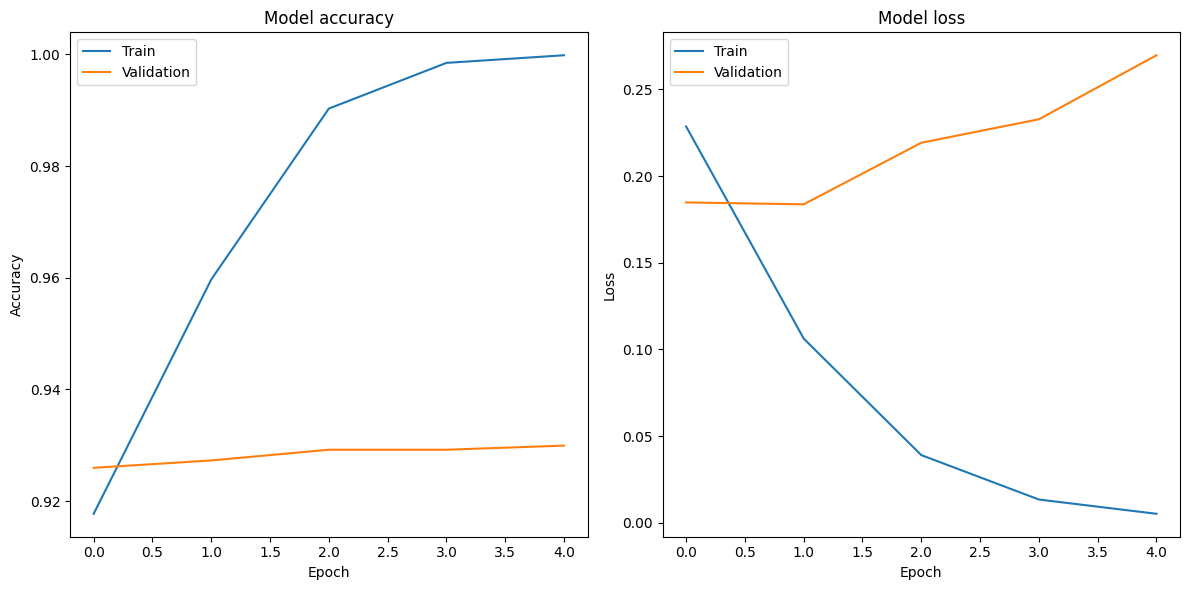

In [ ]:
#Gráfico de los valores de precisión en el entrenamiento y validación
#Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_ffnn.history['accuracy'])
plt.plot(history_ffnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Gráfico de los valores de entrenamiento y pérdida
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_ffnn.history['loss'])
plt.plot(history_ffnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


**Debido que a que el dataset pre-procesado es una serie, la convertiré a lista para que no me genere error en la función make_prediction. Para eso, utilizaré el método tolist()**

In [ ]:
def make_prediction(text):
    preprocessed_text = df['Clean_Review_Text'].tolist()
    sequence = tokenizer.texts_to_sequences(preprocessed_text)
    padded_sequence = pad_sequences(sequence, maxlen=100)
    predictions = model_ffnn.predict(padded_sequence)
    return predictions


In [ ]:
# Ejemplo de texto
example_text = "It was great!"

# Imprimir las predicciones
print(make_prediction(example_text))

1324/1324 [==============================] - 4s 3ms/step
[[0.9884983]
 [1.       ]
 [0.9995101]
 ...
 [0.999124 ]
 [1.       ]
 [1.       ]]


In [ ]:
# Ejemplo de texto
example_text = "I did not like it!"

# Imprimir las predicciones
print(make_prediction(example_text))

1324/1324 [==============================] - 4s 3ms/step
[[0.9884983]
 [1.       ]
 [0.9995101]
 ...
 [0.999124 ]
 [1.       ]
 [1.       ]]


**Las predicciones (en su total 1324) predice con un alcance del 98% de efectividad y en un total de tiempo de 4 segundos y con un tiempo de predicción de 3 milisegundos. **

**#MODELO NEURONAL RECURRENTE (LSTM)**
Lo que se va a hacer es clasificar los sentimientos de los reviews de las peliculas del DataFrame

In [ ]:
# Definir el modelo
model_lstm = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=100, trainable=False),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Printear la arquitectura del modelo
model_ffnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1010001 (3.85 MB)
Trainable params: 1010001 (3.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ejemplo de entrenamiento del modelo y guardado del historial
history_lstm = model_ffnn.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
848/848 [==============================] - 19s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3054 - val_accuracy: 0.9295
Epoch 2/5
848/848 [==============================] - 21s 25ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.9298
Epoch 3/5
848/848 [==============================] - 19s 22ms/step - loss: 6.5501e-04 - accuracy: 1.0000 - val_loss: 0.3333 - val_accuracy: 0.9296
Epoch 4/5
848/848 [==============================] - 22s 27ms/step - loss: 3.7855e-04 - accuracy: 1.0000 - val_loss: 0.3509 - val_accuracy: 0.9289
Epoch 5/5
848/848 [==============================] - 24s 28ms/step - loss: 2.2793e-04 - accuracy: 1.0000 - val_loss: 0.3848 - val_accuracy: 0.9295


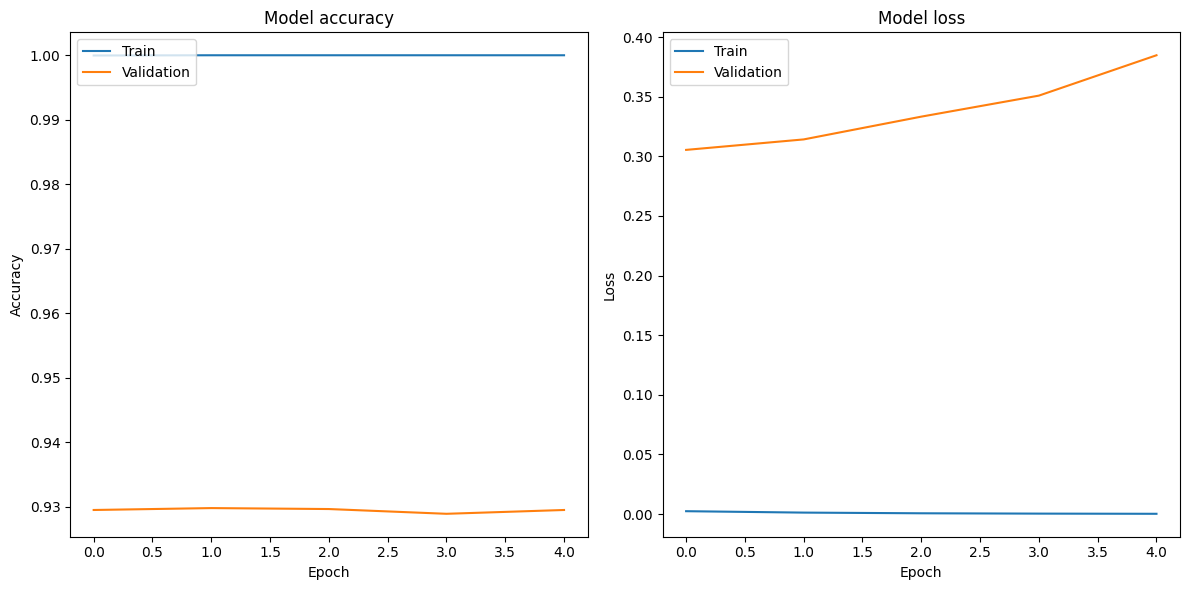

In [ ]:
#Gráfico de los valores de entrenamiento y accuracy
#Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Gráfico de valores de entrenamiento y validación
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

**MODELO DE BERT **
En este apartado utilizaremos un modelo preentrenado de BERT para clasificar los sentimientos de los tweets. BERT es un modelo de lenguaje bidireccional que ha sido preentrenado en un gran corpus de texto. Utilizaremos la librería transformers de Hugging Face para cargar el modelo preentrenado y entrenar un clasificador de sentimientos.

In [ ]:
from transformers import BertTokenizer
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_length = 128  #Ajustar según el conjunto de datos
input_ids = []
attention_masks = []

for text in df['Clean_Review_Text']:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='tf',
        truncation=True
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = np.concatenate(input_ids, axis=0)
attention_masks = np.concatenate(attention_masks, axis=0)


In [ ]:
# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Construct the model for binary classification
input_ids_layer = Input(shape=(max_length,), dtype='int32', name='input_ids')
attention_masks_layer = Input(shape=(max_length,), dtype='int32', name='attention_mask')
bert_output = bert_model(input_ids_layer, attention_mask=attention_masks_layer)[1]
dropout = Dropout(0.1)(bert_output)
output = Dense(units=1, activation='sigmoid')(dropout)

model = Model(inputs=[input_ids_layer, attention_masks_layer], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                     

**Comienzo del entrenamiento del modelo de BERT utilizando los datos codificados  (input_ids y attention_masks) , peor en este caso, se utilizará la columna Rating como factoor de salida para qeu no haya errores de tipo de datos o compatibilidad **

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    [input_ids, attention_masks],  # Datos de entrada, representaria el texto pre-procesado 'Clean_Review_Text'
    df['Rating'].values,  # Etiquetas de salida, representaría la puntuación de esos reviews (compatbilidad al ser numero)
    batch_size=32,  # Tamaño del lote
    validation_split=0.2,  # Fracción de datos para validación
    epochs=3  # Número de épocas
)


Epoch 1/3
  10/1060 [..............................] - ETA: 18:00:17 - loss: -57.3078 - accuracy: 0.0312

KeyboardInterrupt: 

**MODELO PREENTRENADO DE BERT **

In [ ]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [ ]:
# Cargamos el modelo
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Preprocesamos el texto
text = "Covid cases are increasing fast!"
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)
scores = output[0][0].numpy()
scores = softmax(scores)

In [ ]:
# Printeamos los resultados
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) neutral 0.3666
2) negative 0.336
3) positive 0.2974


COMPARACIÓN DE LOS RESULTADOS DE LOS MODELOS LSTM Y FFNN
Para esto se utilizará una matriz de confusión

In [ ]:
# Evaluamos el modelo ffnn en los datos de test
loss_ffnn, accuracy_ffnn = model_ffnn.evaluate(X_test, y_test)

# Evaluamos el modelo lstm en los datos de test
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)

print(f"Accuracy of model_ffnn: {accuracy_ffnn}")
print(f"Accuracy of model_lstm: {accuracy_lstm}")

265/265 [==============================] - 26s 95ms/step - loss: 0.7218 - accuracy: 0.1717
Accuracy of model_ffnn: 0.9329714179039001
Accuracy of model_lstm: 0.17170166969299316


265/265 [==============================] - 17s 62ms/step


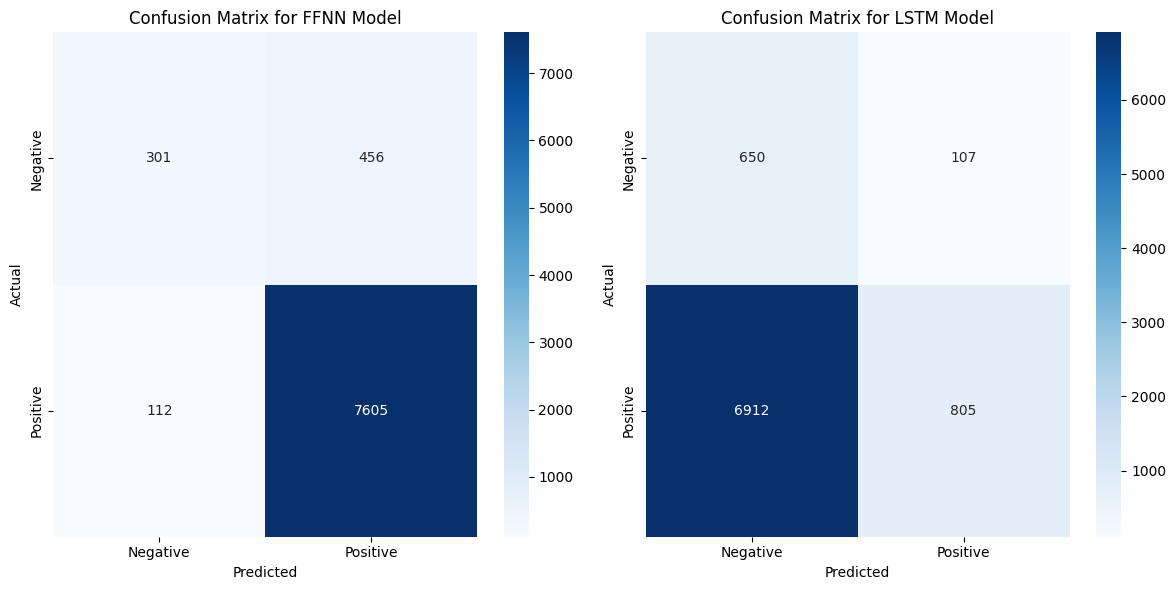

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions for model_ffnn
y_pred_ffnn = model_ffnn.predict(X_test)
y_pred_ffnn = (y_pred_ffnn > 0.5).astype(int)

# Get the predictions for model_lstm
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# Compute the confusion matrix for model_ffnn
cm_ffnn = confusion_matrix(y_test, y_pred_ffnn)

# Compute the confusion matrix for model_lstm
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Plot both confusion matrices side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_ffnn, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for FFNN Model')
plt.subplot(1, 2, 2)
sns.heatmap(cm_lstm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LSTM Model')

plt.tight_layout()

Pareciera que el primer modelo, el Feed Forward, es el que responde de manera más positiva y efectiva a las predicciones , en comparación al segundo que modelo que no coincide mucho en números con las reviews.

In [ ]:
#Guardo el documento en Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
